<a href="https://colab.research.google.com/github/Bash-Code/COVID_19_DATA_PROJECT/blob/main/Predict_Covid19_on_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing of Covid19 Dataset


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data = pd.read_excel('/content/sample_data/dataset.xlsx')

In [91]:
df = data.copy()

In [92]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

création des sous ensembles

In [94]:
missing_rate = df.isna().sum()/df.shape[0]
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 111, dtype: float64

In [95]:
blood_col = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_col = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [96]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [97]:
df = df[key_columns+blood_col+viral_col]

In [98]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


**TrainTest - nettoyage -encodage**



In [99]:
from sklearn.model_selection import train_test_split

In [100]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state=0)

In [101]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [102]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

**Encodage**

In [103]:
def encodage(df):
  code = {'positive':1,'negative':0,'detected':1,'not_detected':0}
  for col in df.select_dtypes('object').columns:
    df[col]=df[col].map(code)

  return df

In [104]:
def imputation(df):
  #df['is na']=(df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
  #df = df.fillna(-999)
  df = df.dropna(axis=0)
  return df

In [105]:
def feature_engineering(df):
  df['est malade'] = df[viral_col].sum(axis=1)>=1
  df = df.drop(viral_col, axis=1)
  return df


In [106]:
def preprocessing(df):
  df = encodage(df)
  df = feature_engineering(df)
  df = imputation(df)

  X = df.drop('SARS-Cov-2 exam result', axis=1)
  y = df['SARS-Cov-2 exam result']

  print(y.value_counts())

  return X, y

In [107]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [108]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


**Modelisation**

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing  import PolynomialFeatures, StandardScaler


In [110]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False),SelectKBest(f_classif,k=10))

In [111]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [112]:
dict_of_models = {'RandomForest': RandomForest, 'AdaBoost' : AdaBoost, 'SVM': SVM, 'KNN':KNN}

**Évaluation**

In [113]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [114]:
def evaluation(model):
  model.fit(X_train, y_train)
  ypred = model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))

  plt.figure()
  plt.plot(N, train_score.mean(axis=1),label='train score')
  plt.plot(N, val_score.mean(axis=1), label='validation score')
  plt.legend()

RandomForest
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

AdaBoost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71  

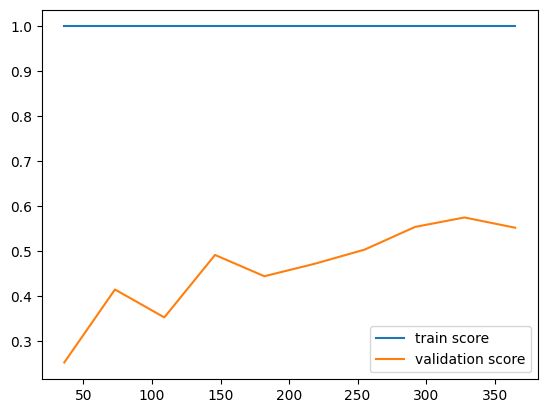

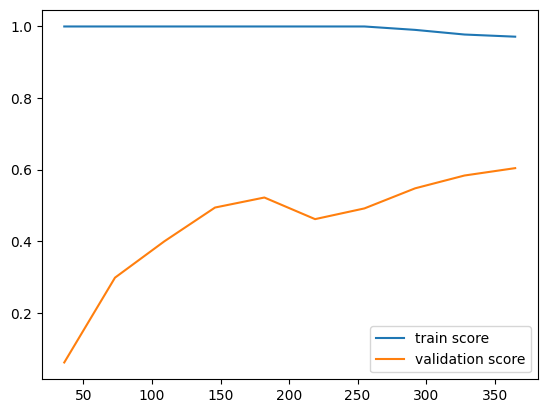

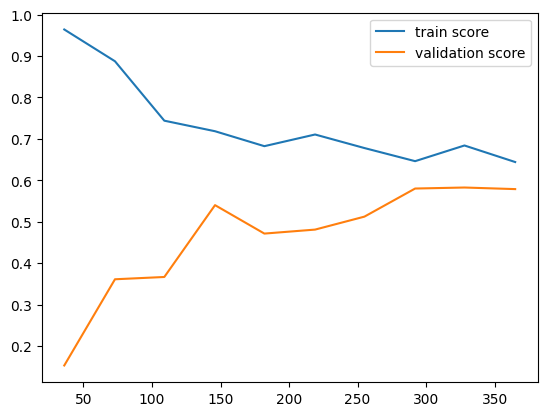

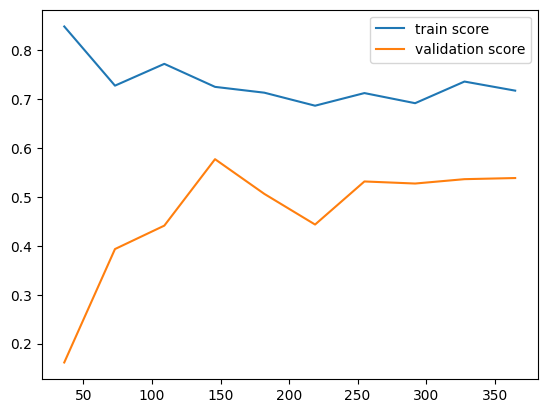

In [115]:
for name, model in dict_of_models.items():
  print(name)
  evaluation(model)

**OPTIMISATION**

In [116]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [117]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [123]:
hyper_params = {'svc__gamma':[1e-3,1e-4],'svc__C':[1,10,100,1000], 'pipeline__polynomialfeatures__degree':[2,3,4],'pipeline__selectkbest__k':range(40,60)}

In [124]:
grid = RandomizedSearchCV(SVM, hyper_params,scoring='recall', cv=4, n_iter=60)

grid.fit(X_train, y_train)

print(grid.best_params_)

ypred = grid.predict(X_test)

print(classification_report(y_test, ypred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 47, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



[[90  5]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



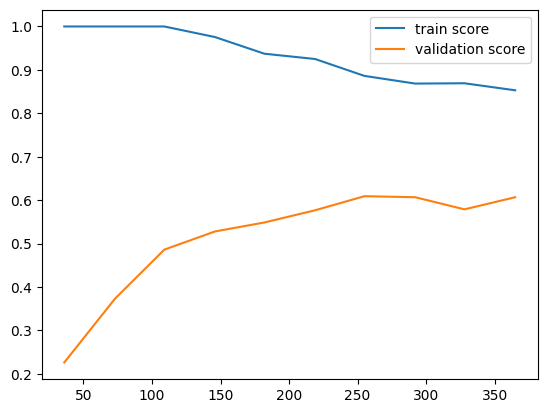

In [125]:
evaluation(grid.best_estimator_)

**Precision recall curve**

In [126]:
from sklearn.metrics import precision_recall_curve

In [129]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

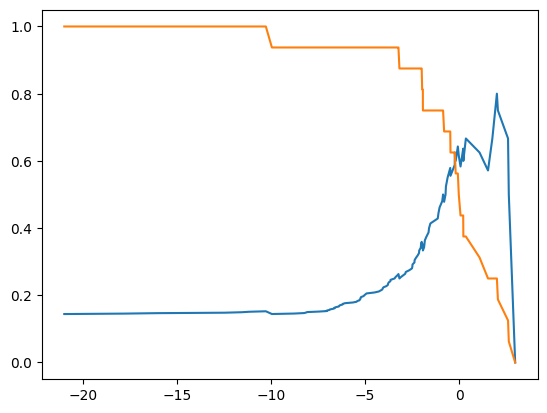

In [132]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')

In [133]:
def model_final(model,X,threshold=0):
  return model.decision_function(X) > threshold

In [134]:
ypred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [136]:
from sklearn.metrics import recall_score

In [137]:
recall_score(y_test, ypred)

0.75

In [135]:
f1_score(y_test, ypred)

0.5853658536585366